In [1]:
import numpy as np
import pandas as pd
import glob, os    
import matplotlib.pyplot as plt

In [3]:
frame

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,VIC1,2020/07/01 00:30:00,5004.56,38.59,TRADE
1,VIC1,2020/07/01 01:00:00,4875.82,37.35,TRADE
2,VIC1,2020/07/01 01:30:00,4757.59,35.66,TRADE
3,VIC1,2020/07/01 02:00:00,4584.00,28.97,TRADE
4,VIC1,2020/07/01 02:30:00,4414.86,20.46,TRADE
...,...,...,...,...,...
32347,VIC1,2020/02/29 22:00:00,4338.92,48.74,TRADE
32348,VIC1,2020/02/29 22:30:00,4259.62,48.34,TRADE
32349,VIC1,2020/02/29 23:00:00,4293.57,45.76,TRADE
32350,VIC1,2020/02/29 23:30:00,4487.10,65.20,TRADE


In [2]:
# 2019 data
electricity_data_2019 = pd.read_csv("dataset/electricity_data_2019.csv", index_col=None, header=0)
# 2020 data
electricity_data_2020 = pd.read_csv("dataset/electricity_data_2020.csv", index_col=None, header=0)

In [3]:
electricity_data_2019

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,VIC1,2019/02/01 00:30:00,4012.27,100.97,TRADE
1,VIC1,2019/02/01 01:00:00,3879.38,86.00,TRADE
2,VIC1,2019/02/01 01:30:00,3810.66,113.73,TRADE
3,VIC1,2019/02/01 02:00:00,3683.81,95.01,TRADE
4,VIC1,2019/02/01 02:30:00,3656.39,82.59,TRADE
...,...,...,...,...,...
11659,VIC1,2019/07/31 22:00:00,6110.77,104.43,TRADE
11660,VIC1,2019/07/31 22:30:00,5770.16,104.04,TRADE
11661,VIC1,2019/07/31 23:00:00,5520.57,102.62,TRADE
11662,VIC1,2019/07/31 23:30:00,5619.90,104.34,TRADE


In [4]:
electricity_data_2020

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,VIC1,2020/07/01 00:30:00,5004.56,38.59,TRADE
1,VIC1,2020/07/01 01:00:00,4875.82,37.35,TRADE
2,VIC1,2020/07/01 01:30:00,4757.59,35.66,TRADE
3,VIC1,2020/07/01 02:00:00,4584.00,28.97,TRADE
4,VIC1,2020/07/01 02:30:00,4414.86,20.46,TRADE
...,...,...,...,...,...
32347,VIC1,2020/02/29 22:00:00,4338.92,48.74,TRADE
32348,VIC1,2020/02/29 22:30:00,4259.62,48.34,TRADE
32349,VIC1,2020/02/29 23:00:00,4293.57,45.76,TRADE
32350,VIC1,2020/02/29 23:30:00,4487.10,65.20,TRADE


In [5]:
electricity_data_2019['SETTLEMENTDATE'] = pd.to_datetime(electricity_data_2019['SETTLEMENTDATE'])
electricity_data_2019 = electricity_data_2019[electricity_data_2019['SETTLEMENTDATE'] < '2019-09-01']
electricity_data_2019.sort_values(by='SETTLEMENTDATE')
electricity_data_2019 = electricity_data_2019.groupby(pd.Grouper(key='SETTLEMENTDATE', freq='1H')).sum()
electricity_data_2019
electricity_data_2019['TOTALDEMAND'].mean()

10097.934958847738

In [6]:
electricity_data_2020['SETTLEMENTDATE'] = pd.to_datetime(electricity_data_2020['SETTLEMENTDATE'])
electricity_data_2020 = electricity_data_2020[electricity_data_2020['SETTLEMENTDATE'] < '2020-09-01']
electricity_data_2020.sort_values(by='SETTLEMENTDATE')
electricity_data_2020 = electricity_data_2020.groupby(pd.Grouper(key='SETTLEMENTDATE', freq='1H')).sum()
electricity_data_2020
electricity_data_2020['TOTALDEMAND'].mean()

27373.47230191257

In [7]:
electricity_data_2019 = electricity_data_2019.reset_index()
electricity_data_2019

,SETTLEMENTDATE,TOTALDEMAND,RRP
0,2019-01-01 00:00:00,4286.24,71.49
1,2019-01-01 01:00:00,8185.31,146.90
2,2019-01-01 02:00:00,7644.24,138.84
3,2019-01-01 03:00:00,7291.20,126.95
4,2019-01-01 04:00:00,7186.07,101.07
...,...,...,...
5827,2019-08-31 19:00:00,11038.99,356.32
5828,2019-08-31 20:00:00,10632.05,261.58
5829,2019-08-31 21:00:00,10198.26,222.44
5830,2019-08-31 22:00:00,9703.40,222.48


In [8]:
electricity_data_2019['SETTLEMENTDATE'] = electricity_data_2019['SETTLEMENTDATE'].dt.time
electricity_data_2019

,SETTLEMENTDATE,TOTALDEMAND,RRP
0,00:00:00,4286.24,71.49
1,01:00:00,8185.31,146.90
2,02:00:00,7644.24,138.84
3,03:00:00,7291.20,126.95
4,04:00:00,7186.07,101.07
...,...,...,...
5827,19:00:00,11038.99,356.32
5828,20:00:00,10632.05,261.58
5829,21:00:00,10198.26,222.44
5830,22:00:00,9703.40,222.48


In [9]:
electricity_data_2019.set_index('SETTLEMENTDATE')
electricity_data_2019 = electricity_data_2019.groupby(['SETTLEMENTDATE']).mean()
electricity_data_2019

,TOTALDEMAND,RRP
SETTLEMENTDATE,,
00:00:00,9549.022551,206.918436
01:00:00,8892.786543,170.797654
02:00:00,8328.786379,148.706626
03:00:00,7998.616091,134.615556
04:00:00,7972.640700,134.198930
05:00:00,8329.048066,152.529630
06:00:00,9222.841934,193.507078
07:00:00,10230.092346,249.743374
08:00:00,10751.841523,242.325309


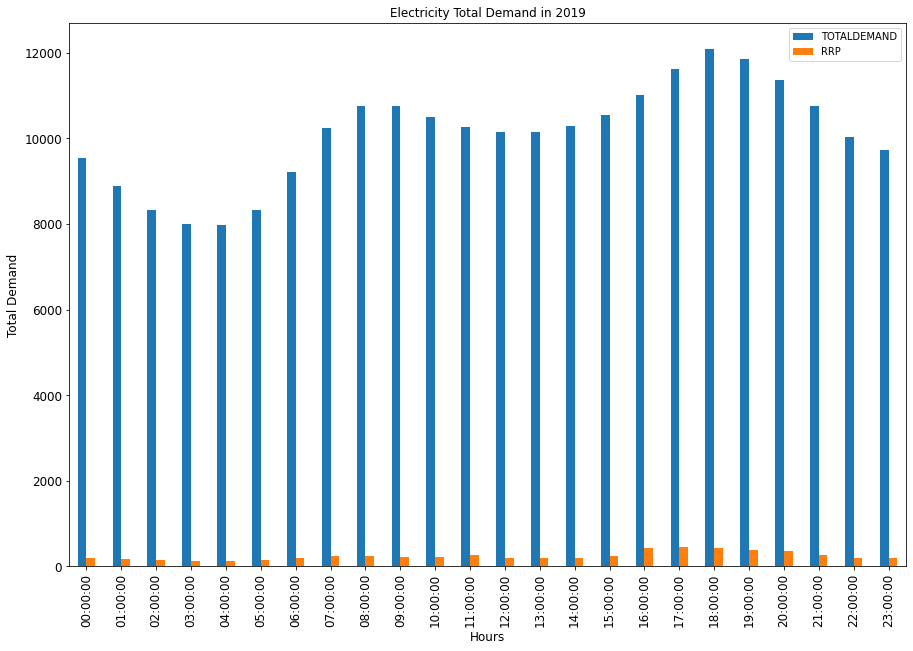

In [10]:
ax = electricity_data_2019.plot(kind='bar', title ="Electricity Total Demand in 2019", figsize=(15, 10), legend=True, fontsize=12)
ax.ticklabel_format(style='plain', axis='y')
ax.set_xlabel("Hours", fontsize=12)
ax.set_ylabel("Total Demand", fontsize=12)
plt.show()

In [11]:
electricity_data_2020 = electricity_data_2020.reset_index()
electricity_data_2020

,SETTLEMENTDATE,TOTALDEMAND,RRP
0,2020-01-01 00:00:00,12555.96,194.28
1,2020-01-01 01:00:00,24037.59,385.71
2,2020-01-01 02:00:00,22444.74,383.04
3,2020-01-01 03:00:00,21459.69,369.27
4,2020-01-01 04:00:00,20986.65,336.21
...,...,...,...
5851,2020-08-31 19:00:00,39880.83,845.85
5852,2020-08-31 20:00:00,37855.86,382.08
5853,2020-08-31 21:00:00,35544.39,363.03
5854,2020-08-31 22:00:00,32993.70,396.36


In [12]:
electricity_data_2020['SETTLEMENTDATE'] = electricity_data_2020['SETTLEMENTDATE'].dt.time
electricity_data_2020

,SETTLEMENTDATE,TOTALDEMAND,RRP
0,00:00:00,12555.96,194.28
1,01:00:00,24037.59,385.71
2,02:00:00,22444.74,383.04
3,03:00:00,21459.69,369.27
4,04:00:00,20986.65,336.21
...,...,...,...
5851,19:00:00,39880.83,845.85
5852,20:00:00,37855.86,382.08
5853,21:00:00,35544.39,363.03
5854,22:00:00,32993.70,396.36


In [13]:
electricity_data_2020.set_index('SETTLEMENTDATE')
electricity_data_2020 = electricity_data_2020.groupby(['SETTLEMENTDATE']).mean()
electricity_data_2020

,TOTALDEMAND,RRP
SETTLEMENTDATE,,
00:00:00,26496.638730,268.888402
01:00:00,24771.219549,231.193689
02:00:00,23129.639467,193.064385
03:00:00,22080.705205,162.898361
04:00:00,21889.226025,160.343852
05:00:00,22717.011270,188.037172
06:00:00,24905.323238,238.483443
07:00:00,27452.652910,293.217459
08:00:00,29191.652008,322.509385


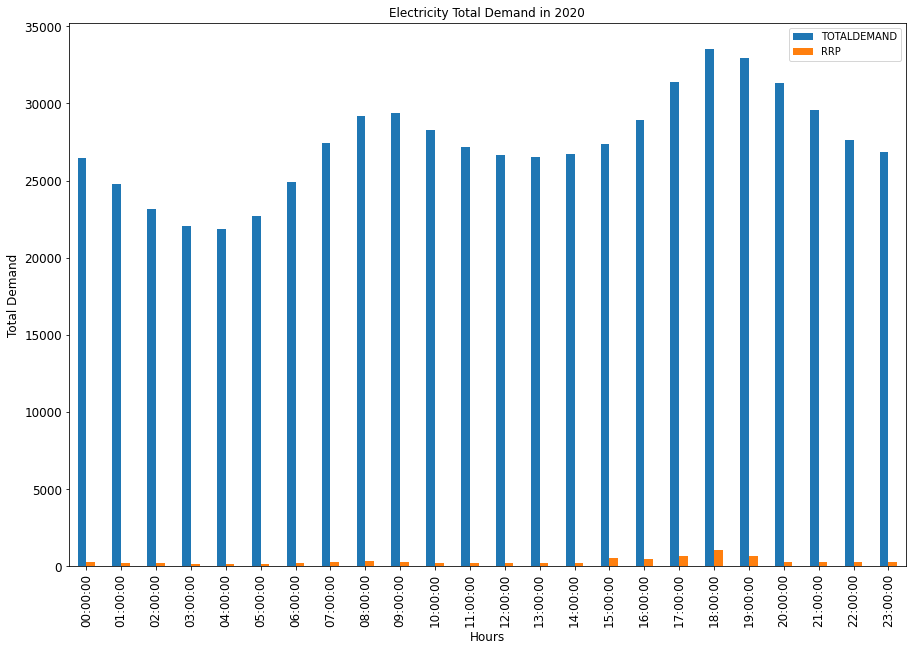

In [14]:
ax = electricity_data_2020.plot(kind='bar', title ="Electricity Total Demand in 2020", figsize=(15, 10), legend=True, fontsize=12)
ax.ticklabel_format(style='plain', axis='y')
ax.set_xlabel("Hours", fontsize=12)
ax.set_ylabel("Total Demand", fontsize=12)
plt.show()

In [15]:
# total_demand_total = pd.merge(electricity_data_2019, electricity_data_2020, on=['SETTLEMENTDATE'], how='inner')
# total_demand_total
total_demand_2019 = electricity_data_2019.drop('RRP', 1)
total_demand_2019=total_demand_2019.rename(columns = {'TOTALDEMAND':'TOTALDEMAND_2019'})
total_demand_2019

,TOTALDEMAND_2019
SETTLEMENTDATE,
00:00:00,9549.022551
01:00:00,8892.786543
02:00:00,8328.786379
03:00:00,7998.616091
04:00:00,7972.640700
05:00:00,8329.048066
06:00:00,9222.841934
07:00:00,10230.092346
08:00:00,10751.841523


In [16]:
total_demand_2020 = electricity_data_2020.drop('RRP', 1)
total_demand_2020=total_demand_2020.rename(columns = {'TOTALDEMAND':'TOTALDEMAND_2020'})
total_demand_2020

,TOTALDEMAND_2020
SETTLEMENTDATE,
00:00:00,26496.638730
01:00:00,24771.219549
02:00:00,23129.639467
03:00:00,22080.705205
04:00:00,21889.226025
05:00:00,22717.011270
06:00:00,24905.323238
07:00:00,27452.652910
08:00:00,29191.652008


In [17]:
total_demand = pd.merge(total_demand_2019, total_demand_2020, on=['SETTLEMENTDATE'], how='inner')
total_demand

,TOTALDEMAND_2019,TOTALDEMAND_2020
SETTLEMENTDATE,,
00:00:00,9549.022551,26496.638730
01:00:00,8892.786543,24771.219549
02:00:00,8328.786379,23129.639467
03:00:00,7998.616091,22080.705205
04:00:00,7972.640700,21889.226025
05:00:00,8329.048066,22717.011270
06:00:00,9222.841934,24905.323238
07:00:00,10230.092346,27452.652910
08:00:00,10751.841523,29191.652008


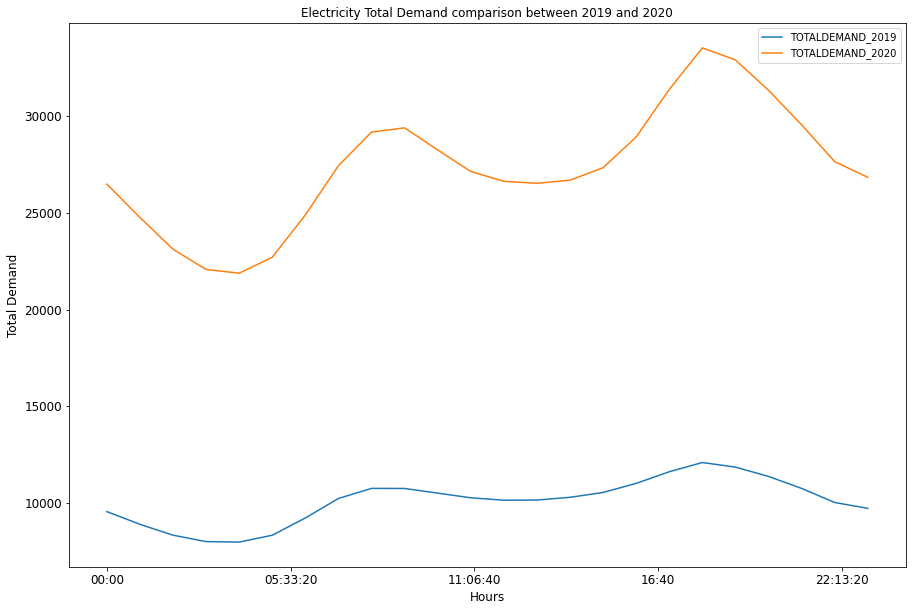

In [18]:
ax = total_demand.plot(kind='line', title ="Electricity Total Demand comparison between 2019 and 2020", figsize=(15, 10), legend=True, fontsize=12)
ax.ticklabel_format(style='plain', axis='y')
ax.set_xlabel("Hours", fontsize=12)
ax.set_ylabel("Total Demand", fontsize=12)
plt.show()

In [19]:
total_rrp_2019 = electricity_data_2019.drop('TOTALDEMAND', 1)
total_rrp_2019 = total_rrp_2019.rename(columns = {'RRP':'RRP_2019'})
total_rrp_2019

total_rrp_2020 = electricity_data_2020.drop('TOTALDEMAND', 1)
total_rrp_2020= total_rrp_2020.rename(columns = {'RRP':'RRP_2020'})
total_rrp_2020

total_rrp = pd.merge(total_rrp_2019, total_rrp_2020, on=['SETTLEMENTDATE'], how='inner')
total_rrp

,RRP_2019,RRP_2020
SETTLEMENTDATE,,
00:00:00,206.918436,268.888402
01:00:00,170.797654,231.193689
02:00:00,148.706626,193.064385
03:00:00,134.615556,162.898361
04:00:00,134.198930,160.343852
05:00:00,152.529630,188.037172
06:00:00,193.507078,238.483443
07:00:00,249.743374,293.217459
08:00:00,242.325309,322.509385


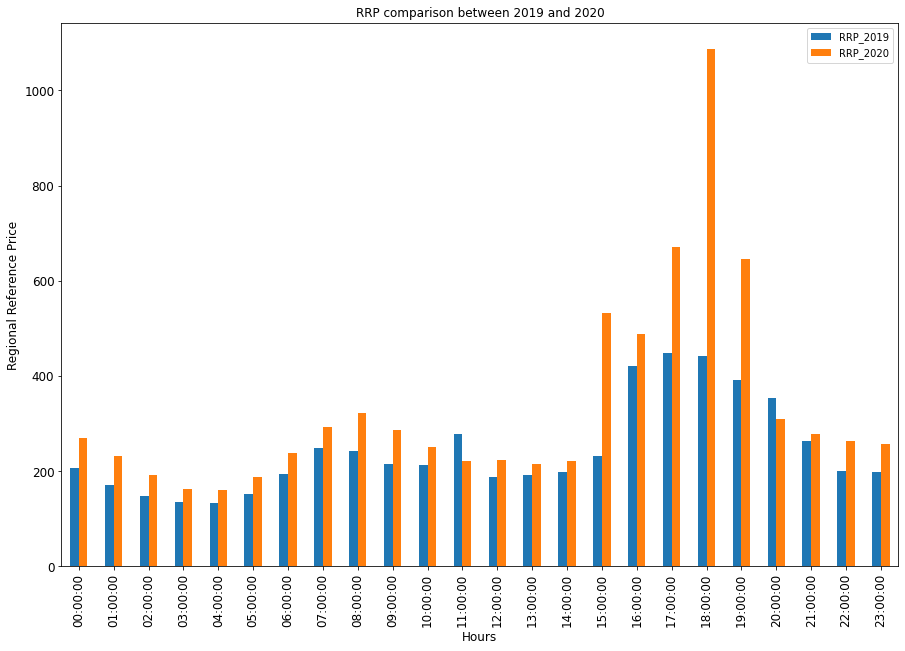

In [20]:
ax = total_rrp.plot(kind='bar', title ="RRP comparison between 2019 and 2020", figsize=(15, 10), legend=True, fontsize=12)
ax.ticklabel_format(style='plain', axis='y')
ax.set_xlabel("Hours", fontsize=12)
ax.set_ylabel("Regional Reference Price", fontsize=12)
plt.show()

In [22]:
total_demand.to_csv('total_demand.csv')
total_rrp.to_csv('total_rrp.csv')